March 26th, 2025

## Reduced QLT hot + cold electron whistler anisotropy instability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Simulations results

In [3]:
def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

def get_A(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return S/(beta_par**alpha)

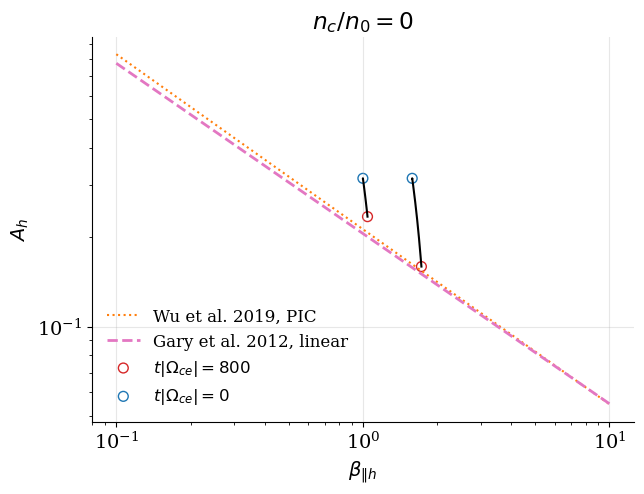

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

params = np.load("data/ensemble_QLT/params.npy")

for ii in range(0, 7):
    res = np.load("data/ensemble_QLT/y_" + str(ii) + ".npy")
    t = np.load("data/ensemble_QLT/t_" + str(ii) + ".npy")
    
    if np.abs(len(t))>100: 
        ax.plot(res[3]*params[ii, 0], res[2]/res[3] -1, color="black")
        ax.scatter(res[3, 0]*params[ii, 0], res[2, 0]/res[3, 0] -1, marker="o", facecolors='none', edgecolors='tab:blue', s=50)
        ax.scatter(res[3, -1]*params[ii, 0], res[2, -1]/res[3, -1] -1, marker="o", facecolors='none', edgecolors='tab:red', s=50)


#ax.plot(params[:, 2], 0.21/(params[:, 2]**0.6), color="tab:green", label="Gary 2005 Cluster/Linear")
ax.plot(params[:11, 2], 0.213/(params[:11, 2]**0.59), color="tab:orange", ls=":", label="Wu et al. 2019, PIC")
ax.plot(params[:11, 2], get_A(nc_n0=0., beta_par=params[:11, 2]), c="tab:pink", ls="--", label=r"Gary et al. 2012, linear", linewidth=2)

ax.scatter(np.nan, np.nan, marker="o", facecolors='none', edgecolors='tab:red', s=50, label="$t|\Omega_{ce}|=800$")
ax.scatter(np.nan, np.nan, marker="o", facecolors='none', edgecolors='tab:blue', s=50, label="$t|\Omega_{ce}|=0$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("$n_{c}/n_{0} = 0$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_xlabel(r"$\beta_{\|h}$")
_ = ax.set_ylabel(r"$A_{h}$")

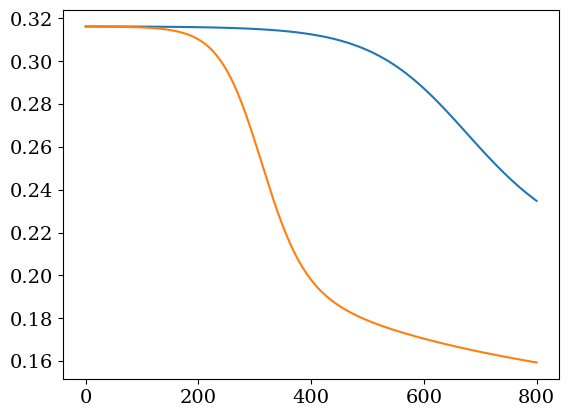

In [23]:
fig, ax = plt.subplots()
for ii in range(0, 7):
        res = np.load("data/ensemble_QLT/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            if res[3, 0]< 2:
                plt.plot(t, res[2, :]/res[3, :] - 1)

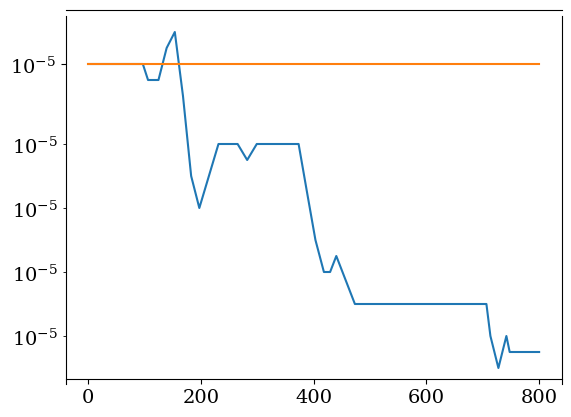

In [27]:
fig, ax = plt.subplots()
for ii in range(0, 7):
        res = np.load("data/ensemble_QLT/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            plt.plot(t, res[5, :])
plt.yscale("log")